# SNe Ia Templates

Plot the SN Ia templates as a function wavelength. There should be 104 templates in v3.0 between 1000 and 25000 &Aring;, corresponding to 104 epochs between -18 and +85 days from peak luminosity.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import seaborn as sns

sns.set(style='white', font_scale=1.8, font='sans-serif')
colors = sns.color_palette('Set2', n_colors=8, desat=0.75)

In [3]:
from desisim.io import read_basis_templates

In [4]:
flux, wave, meta = read_basis_templates('SNE')
print(meta['EPOCH'][0], meta['EPOCH'][-1])

INFO:io.py:955:read_basis_templates: Reading /Users/sybenzvi/Documents/DESI/spectro/templates/basis_templates/v3.0/sne_templates_v1.1.fits
-18.0 85.0


In [5]:
# Find the location 
peak_idx = np.where(meta['EPOCH'].data == 0.)[0]

Nsne = len(flux)
idx = np.arange(2, Nsne, 4)
ncol = 3
nrow = int(len(idx) / ncol)

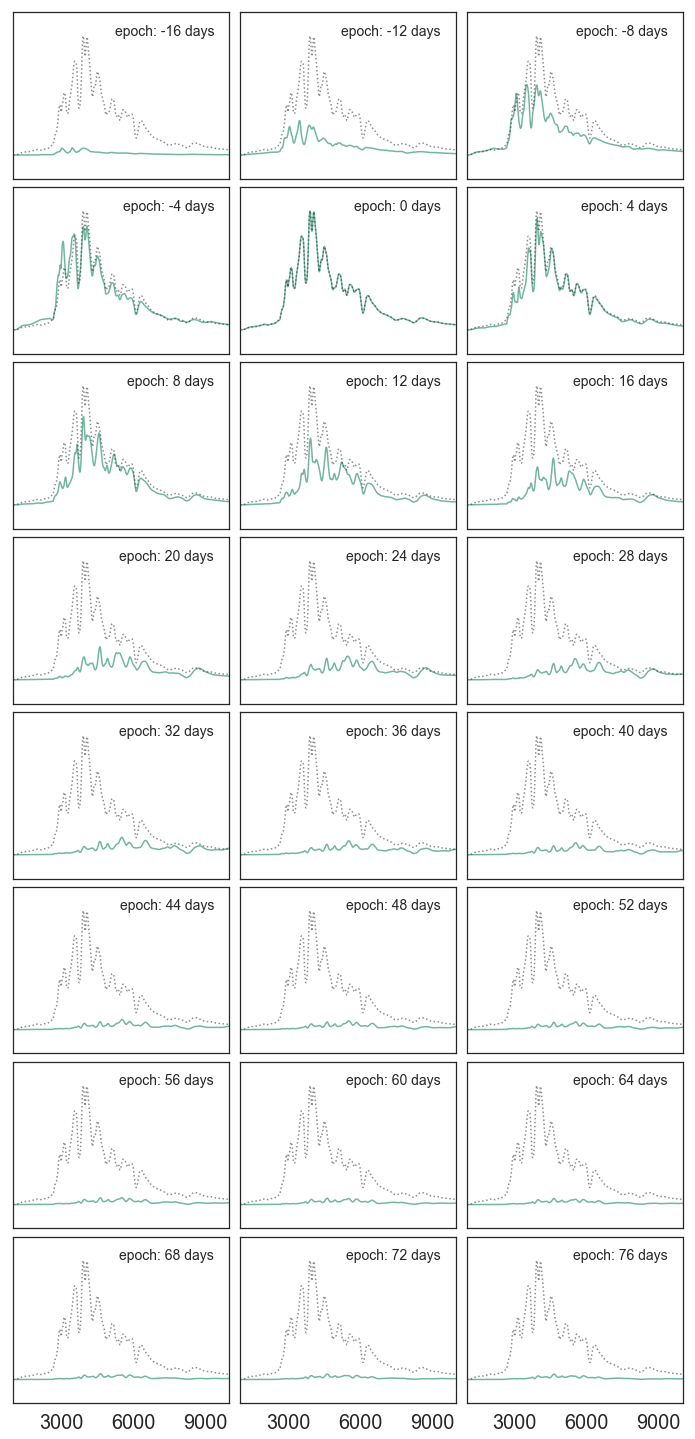

In [6]:
fig, axes = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow), sharex=True, sharey=True)
for i, ax in zip(idx, axes.flatten()):
    ax.plot(wave, flux[i], color=colors[0])
    
    if peak_idx.size > 0:
        j = peak_idx[0]
        ax.plot(wave, flux[j], 'k:', alpha=0.5)
    
    epoch = 'epoch: {:g} days'.format(meta['EPOCH'][i])
    ax.text(0.93, 0.93, epoch, ha='right', va='top',
            transform=ax.transAxes, fontsize=14)
    
    ax.set(xlim=(wave[0], 10000))
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_ticks([])
    ax.margins(0.2)
    
    
fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.93)